In [3]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [4]:
    #Problem parameters#

ms = 50                 #mass of the rocket shell#
g = 9.81                #Srlsy?#
rho = 1.091             #air density#
A = 3.14159265358979323846264338 * 0.5**2    #max cross sectional area of the rocket#
ve = 325                #Exhaust velocity#
cd = 0.15               #Drag coefficient#
pbr = 20                #Propelant burn rate when t<5s#
    #Every coefficient expressed in S.I. units#
    
    #Initial conditions#
h0 = 0
v0 = 0
mp0 = 100

In [5]:
            #Movement equations-One function to express them all#
    
    #Variables : array containing height (h), velocity (v) [h,v]           #
    #Return : Using the equation of motion, returns the d/dt of h and v in #
    #         the form of an array [dh/dt, dv/dt]                          #

In [6]:
def f(u):
        
    h = u[0]
    v = u[1]
    mp = u[2]
    
    output = numpy.array([v,
              -g + (pbr * ve/ (ms+mp)) - 0.5 *rho*v*numpy.abs(v) *A*cd/ (ms+mp),
              -pbr])
    return output

In [7]:
def euler_step (u,f,dt):
    return u + dt * f(u)

In [41]:
                    #Euler's method#

dt = 0.1
time=0
t = numpy.array([])    #Time table
u = numpy.empty((1,3)) #Solutions table, initially contains only one 3-vector
u[0]=[h0,v0,mp0]       #Putin initial conditions
while u[-1][0] >= 0 :  #while height is g.o.e than 0, run euler
    if u[-1][2] >0 :   #if there's still fuel in the rocket, then BUUUURN IT
        pbr= 20
    else:
        pbr= 0
    eustep= euler_step(u[-1], f, dt)  #euler FTW
    u=numpy.append(u,[eustep],0)      #Putin the step in the table
    time=time+dt
    t=numpy.append(t,[time])          #Putin the time in the timetable

In [42]:
#Getting the values of Height and Velocity in separate tables. They will be used for the graphics#
H=numpy.zeros(len(u)-1)
V=numpy.zeros(len(u)-1)
for i in range (0,len(u)-1):
    H[i] = u[i][0]
    V[i] = u[i][1]

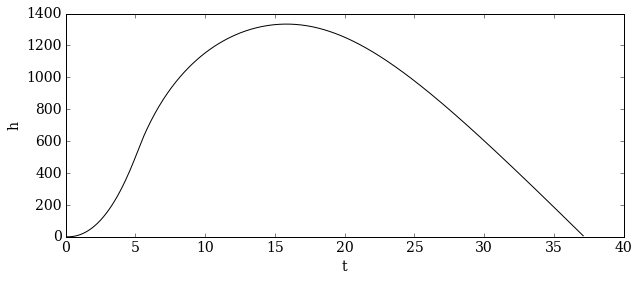

In [43]:
pyplot.figure(figsize=(10,4))   #set plot size

pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('h', fontsize=14) #y label
pyplot.plot(t,H, 'k-');

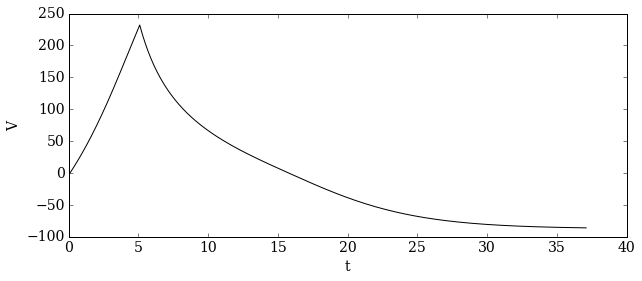

In [44]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('V', fontsize=14) #y label
pyplot.plot(t,V, 'k-');

In [45]:
def RK2_step(u,f,dt):
    U = u + 0.5*dt*f(u)
    u = u + dt*f(U)
    return u

In [26]:
                    #Runge-Kutta method#

dt = 0.1
time=0
t = numpy.array([])    #Time table
u = numpy.empty((1,3)) #Solutions table, initially contains only one 3-vector
u[0]=[h0,v0,mp0]       #Putin initial conditions
while u[-1][0] >= 0 :  #while height is g.o.e than 0, run euler
    if u[-1][2] >0 :   #if there's still fuel in the rocket, then BUUUURN IT
        pbr= 20
    else:
        pbr= 0
    eustep= RK2_step(u[-1], f, dt)  #euler FTW
    u=numpy.append(u,[eustep],0)      #Putin the step in the table
    time=time+dt
    t=numpy.append(t,[time])          #Putin the time in the timetable